
**The code below fetches a dataset of plant data from the GitHub repository. It retrieves the data directly from a raw URL, processes the response to read its content into memory as text.**

In [51]:
import requests

# GitHub link to the raw data
url = "https://raw.githubusercontent.com/aswanyshaji/Datamining_report_Assignment/main/plants.data"

# Fetch the raw data
response = requests.get(url)

if response.status_code == 200:
    # Read the content into memory without saving it to a file
    lines = response.text.splitlines()
    print("Data successfully fetched.")
else:
    print(f"Failed to fetch the dataset. HTTP Status Code: {response.status_code}")


Data successfully fetched.


**The following code parses the fetched plant data into a structured format. It splits each line of the dataset into species and state information, then combines the data into a structured list. This list is converted into a Pandas DataFrame for easier analysis and visualization. Finally, the first few rows of the dataset are displayed as a preview**

In [36]:
import pandas as pd

# Parse the data into a structured list
data = []
for line in lines:
    parts = line.strip().split(",")  # Split by comma
    species = parts[0]
    states = ",".join(parts[1:])  # Combine remaining columns into a single string
    data.append([species, states])

# Convert the data into a DataFrame
plants_data = pd.DataFrame(data, columns=["Plant_Species", "States"])

# Display the first few rows
print("Dataset Preview:")
print(plants_data.head())


Dataset Preview:
            Plant_Species                                        States
0                  abelia                                         fl,nc
1    abelia x grandiflora                                         fl,nc
2             abelmoschus  ct,dc,fl,hi,il,ky,la,md,mi,ms,nc,sc,va,pr,vi
3  abelmoschus esculentus     ct,dc,fl,il,ky,la,md,mi,ms,nc,sc,va,pr,vi
4   abelmoschus moschatus                                         hi,pr



**The following code identifies and handles missing values in the dataset. It removes rows with missing plant species, fills missing states with "unknown," and verifies that no missing values remain. Finally, it displays a preview of the cleaned dataset.**

In [38]:
# Check for missing values
print("\nMissing Values:")
print(plants_data.isnull().sum())

# Drop rows where Plant_Species is missing
plants_data.dropna(subset=["Plant_Species"], inplace=True)

# Fill missing States with 'unknown'
plants_data["States"].fillna("unknown", inplace=True)

# Verify no missing values remain
print("\nMissing Values After Handling:")
print(plants_data.isnull().sum())

# Display updated dataset
print("\nUpdated Dataset Preview:")
print(plants_data.head())



Missing Values:
Plant_Species    0
States           0
dtype: int64

Missing Values After Handling:
Plant_Species    0
States           0
dtype: int64

Updated Dataset Preview:
            Plant_Species                                        States
0                  abelia                                         fl,nc
1    abelia x grandiflora                                         fl,nc
2             abelmoschus  ct,dc,fl,hi,il,ky,la,md,mi,ms,nc,sc,va,pr,vi
3  abelmoschus esculentus     ct,dc,fl,il,ky,la,md,mi,ms,nc,sc,va,pr,vi
4   abelmoschus moschatus                                         hi,pr


<ipython-input-38-96b598269b07>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  plants_data["States"].fillna("unknown", inplace=True)


**The next part of the code standardizes the dataset by cleaning plant species names (removing non-alphabetic characters and converting to lowercase) and formatting state names (removing spaces, converting to lowercase, and ensuring consistent comma-separated formatting).**

In [39]:
import re

# Normalize Plant_Species
plants_data["Plant_Species"] = plants_data["Plant_Species"].apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", x).lower())

# Normalize States (remove spaces and ensure lowercase)
plants_data["States"] = plants_data["States"].apply(lambda x: ",".join([state.strip().lower() for state in x.split(",")]))

# Display updated dataset
print("\nNormalized Dataset Preview:")
print(plants_data.head())



Normalized Dataset Preview:
            Plant_Species                                        States
0                  abelia                                         fl,nc
1    abelia x grandiflora                                         fl,nc
2             abelmoschus  ct,dc,fl,hi,il,ky,la,md,mi,ms,nc,sc,va,pr,vi
3  abelmoschus esculentus     ct,dc,fl,il,ky,la,md,mi,ms,nc,sc,va,pr,vi
4   abelmoschus moschatus                                         hi,pr


**The following code applies one-hot encoding to the States column to transform it into a binary format suitable for analysis:**

**Convert States to Lists:** Splits the states column into lists of individual states.

**One-Hot Encoding:** Uses MultiLabelBinarizer to create binary columns for each state, indicating whether a plant species is associated with that state.

**Combine Data:** Merges the encoded state columns with the Plant_Species column for a complete dataset.


In [40]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convert States into a list of states
plants_data["State_List"] = plants_data["States"].apply(lambda x: x.split(","))

# Apply MultiLabelBinarizer for one-hot encoding
mlb = MultiLabelBinarizer()
encoded_states = mlb.fit_transform(plants_data["State_List"])

# Convert the encoded states to a DataFrame
encoded_states_df = pd.DataFrame(encoded_states, columns=mlb.classes_)

# Combine the one-hot encoded states with the original Plant_Species column
plants_data_encoded = pd.concat([plants_data["Plant_Species"], encoded_states_df], axis=1)

# Display the encoded dataset
print("\nOne-Hot Encoded Dataset Preview:")
print(plants_data_encoded.head())



One-Hot Encoded Dataset Preview:
            Plant_Species  ab  ak  al  ar  az  bc  ca  co  ct  ...  tx  ut  \
0                  abelia   0   0   0   0   0   0   0   0   0  ...   0   0   
1    abelia x grandiflora   0   0   0   0   0   0   0   0   0  ...   0   0   
2             abelmoschus   0   0   0   0   0   0   0   0   1  ...   0   0   
3  abelmoschus esculentus   0   0   0   0   0   0   0   0   1  ...   0   0   
4   abelmoschus moschatus   0   0   0   0   0   0   0   0   0  ...   0   0   

   va  vi  vt  wa  wi  wv  wy  yt  
0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0   0  
2   1   1   0   0   0   0   0   0  
3   1   1   0   0   0   0   0   0  
4   0   0   0   0   0   0   0   0  

[5 rows x 71 columns]


**This code uses Principal Component Analysis (PCA) to determine the optimal number of components needed to retain most of the variance in the dataset:**

**Fit PCA:** The PCA model is applied to the one-hot encoded state data to compute all principal components.

**Variance Analysis:** The explained variance ratio is calculated for each component, and the cumulative variance is determined.

**Plot Explained Variance:** A plot shows how the cumulative explained variance increases with the number of components, helping visualize where most of the information is retained.

**Optimal Components:** Identifies and prints the smallest number of components needed to retain 90% of the dataset's variance.


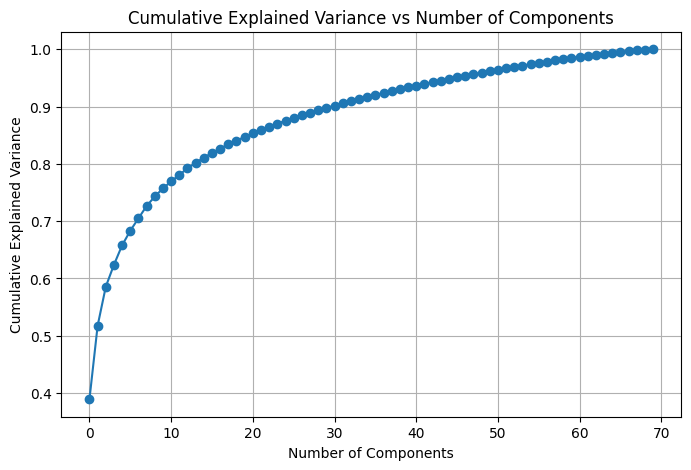

Optimal number of components to retain 90% variance: 31


In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


pca = PCA()  # Compute all components
pca.fit(encoded_states_df)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance vs Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

# Print the number of components needed for 90% variance
optimal_n = np.argmax(cumulative_variance >= 0.90) + 1  # +1 because Python is 0-indexed
print(f"Optimal number of components to retain 90% variance: {optimal_n}")



**The followingcode reduces the dimensionality of the one-hot encoded state data using PCA:**

**Apply PCA:** Reduces the dataset to 31 principal components, as determined earlier to retain 90% of the variance.

**Create Reduced DataFrame:** Constructs a new DataFrame containing the 31 principal components, along with the Plant_Species column for reference.

In [42]:
from sklearn.decomposition import PCA

# Apply PCA to the one-hot encoded states (excluding the Plant_Species column)
pca = PCA(n_components=31)
reduced_data = pca.fit_transform(encoded_states_df)

# Create a DataFrame for the PCA-reduced data
reduced_data_df = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(31)])
reduced_data_df["Plant_Species"] = plants_data["Plant_Species"]

# Display the reduced dataset
print("\nPCA-Reduced Dataset Preview:")
print(reduced_data_df.head())



PCA-Reduced Dataset Preview:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.744941 -0.530463 -0.110390  0.066838 -0.379846  0.078156  0.075151   
1 -0.744941 -0.530463 -0.110390  0.066838 -0.379846  0.078156  0.075151   
2  0.778404 -1.549011  0.199861  0.378910 -0.762203  0.320912  1.243035   
3  0.764782 -1.524348  0.185155  0.392828 -0.661362  0.256651  1.000662   
4 -0.986339 -0.288597 -0.297909 -0.238705 -0.290157  0.011391  0.766556   

        PC8       PC9      PC10  ...      PC23      PC24      PC25      PC26  \
0 -0.213647 -0.191593 -0.299406  ... -0.202313  0.046532  0.272049 -0.227259   
1 -0.213647 -0.191593 -0.299406  ... -0.202313  0.046532  0.272049 -0.227259   
2  0.222444 -0.253866  0.505069  ... -0.193598 -0.324938  0.650625 -0.720211   
3  0.044875 -0.281451  0.371302  ... -0.176167 -0.348794  0.666325 -0.713007   
4  0.289645  0.020958  0.322563  ...  0.045511 -0.064184 -0.057354 -0.026122   

       PC27      PC28      PC29      P

In [43]:
# Number of PCA components
D = reduced_data_df.shape[1] - 1  # Exclude 'Plant_Species' column
min_samples = D + 1
print(f"Calculated min_samples: {min_samples}")


Calculated min_samples: 32



**The following code helps determine the optimal value of eps for the DBSCAN algorithm using a k-distance plo**t:

**Prepare Data:** Uses the PCA-reduced data, excluding the Plant_Species column, for clustering.

**Set k:** Sets the number of neighbors to min_samples - 1

**Compute Nearest Neighbors:** Calculates the distances to the k nearest neighbors for each point using the NearestNeighbors class.

**Extract k-Distance:** Sorts the distances to the k-th nearest neighbor for all points, creating a sequence of distances.

**Plot k-Distance Graph:** Visualizes the distances, where the "elbow" in the curve indicates a suitable eps value for DBSCAN.

This approach ensures the chosen eps value reflects the density of points in the dataset, enhancing the performance of DBSCAN.

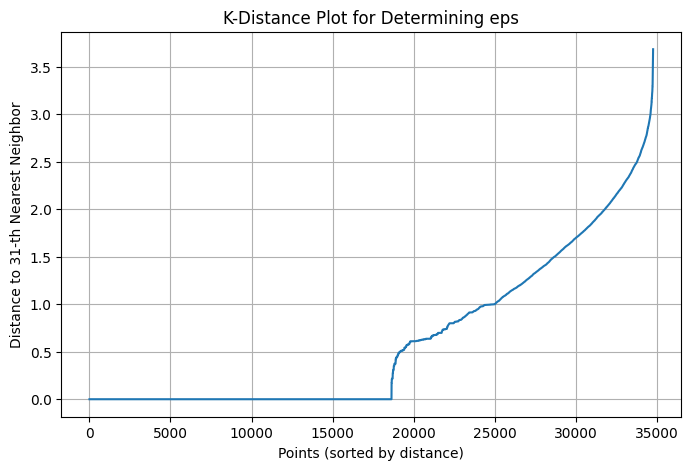

In [44]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Prepare the PCA-reduced data (excluding 'Plant_Species')
pca_data = reduced_data_df.drop(columns=["Plant_Species"]).values

# Set k (min_samples - 1)
k = min_samples - 1  # k = 31

# Compute nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(pca_data)

# Compute distances to the k nearest neighbors
distances, indices = nearest_neighbors.kneighbors(pca_data)

# Extract distances to the k-th nearest neighbor
k_distances = np.sort(distances[:, -1])

# Plot k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.title("K-Distance Plot for Determining eps")
plt.xlabel("Points (sorted by distance)")
plt.ylabel(f"Distance to {k}-th Nearest Neighbor")
plt.grid(True)
plt.show()


**The below code applies the DBSCAN clustering algorithm to the PCA-reduced data and visualizes the results:**

**Apply DBSCAN:** The algorithm is applied with eps determined from the k-distance plot and min_samples as calculated earlier. The clustering labels are predicted for each point.

**Add Cluster Labels:** Cluster labels are added to the PCA-reduced dataset. Points labeled -1 are considered noise.

**Count Clusters and Noise:** The total number of clusters (excluding noise) and the number of noise points are calculated and displayed.

**Visualize Clusters:** A scatter plot is generated using the first two principal components (PC1 and PC2).


Number of clusters: 2
Number of noise points: 2740


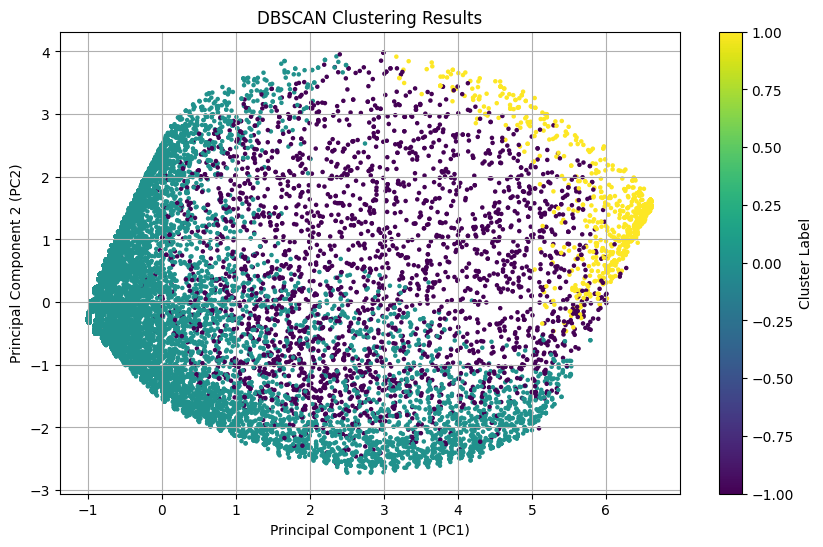

In [45]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Apply DBSCAN
dbscan = DBSCAN(eps = 1.7, min_samples=32)  # Use eps from the k-distance plot
dbscan_labels = dbscan.fit_predict(pca_data)

# Add cluster labels to the PCA-reduced dataset
reduced_data_df["Cluster"] = dbscan_labels

# Check the number of clusters and noise points
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Visualize clustering results
plt.figure(figsize=(10, 6))
plt.scatter(
    reduced_data_df["PC1"],
    reduced_data_df["PC2"],
    c=reduced_data_df["Cluster"],
    cmap="viridis",
    s=5
)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()


This code calculates the **Silhouette Score** to evaluate the quality of clustering produced by the DBSCAN algorithm:

In [46]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
if len(set(dbscan_labels)) > 1:
    silhouette_avg = silhouette_score(pca_data, dbscan_labels)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score cannot be calculated (less than 2 clusters).")


Silhouette Score: 0.4454328811534683



**The following code uses the Elbow Method to determine the optimal number of clusters (k) for the KMeans algorithm:**

**Calculate Inertia:** The inertia (sum of squared distances of points to their nearest cluster center) is computed for different values of k (from 1 to 10 in this case).

**Store Results:** The inertia values for each k are stored in a list for analysis.

**Elbow Plot:** A graph of k vs. inertia is plotted, where the "elbow" point indicates the optimal k. This is the point where adding more clusters no longer significantly reduces inertia, balancing complexity and clustering quality.

**Purpose:** Helps select the most appropriate number of clusters for further analysis.

This method provides a visual and intuitive way to choose k by identifying where the improvement in clustering quality begins to diminish

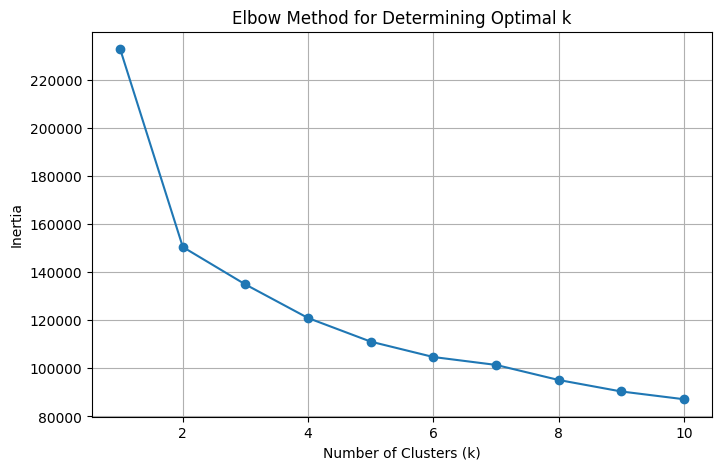

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming pca_data is the PCA-reduced data after DBSCAN or preprocessing

# Step 1: Calculate inertia for different k values
inertia = []
k_values = range(1, 11)  # Try k = 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)  # Store inertia for each k

# Step 2: Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o")
plt.title("Elbow Method for Determining Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


**The following code applies the K-Means clustering algorithm to the PCA-reduced data with the number of clusters (k) set to 3:**

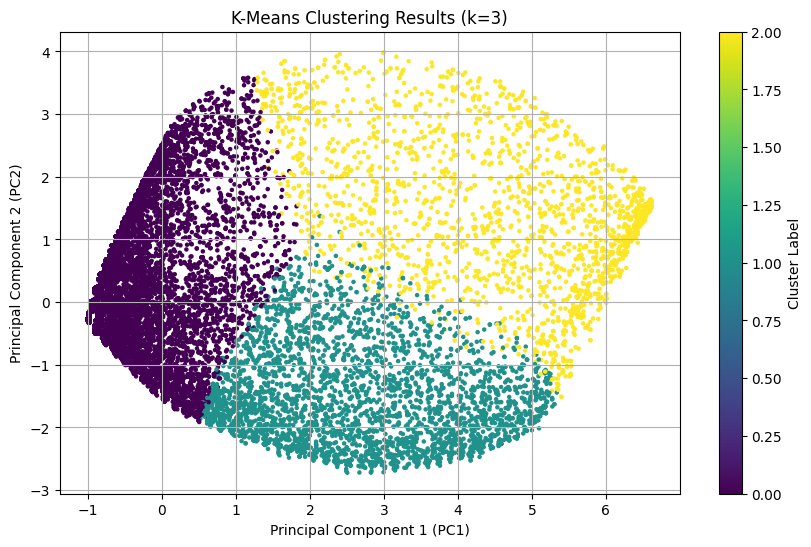

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means with the determined number of clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)

# Add cluster labels to the PCA-reduced dataset
reduced_data_df["Cluster"] = kmeans_labels

# Visualize the clustering results using the first two PCA components
plt.figure(figsize=(10, 6))
plt.scatter(
    reduced_data_df["PC1"],
    reduced_data_df["PC2"],
    c=reduced_data_df["Cluster"],
    cmap="viridis",
    s=5
)
plt.title("K-Means Clustering Results (k=3)")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()


**The following code calculates the Silhouette Score for the clustering results produced by the K-Means algorithm with k=3:**

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(pca_data, kmeans_labels)
print(f"Silhouette Score for k=3: {silhouette_avg}")


Silhouette Score for k=3: 0.48007216663341395


**The below code compares the clustering results from DBSCAN and K-Means by analyzing the number of unique plant species in each cluster:**

In [ ]:
# Assuming you have the cluster labels from DBSCAN and K-Means
reduced_data_df['DBSCAN_Cluster'] = dbscan_labels
reduced_data_df['KMeans_Cluster'] = kmeans_labels

# Group by cluster and get the count of species per cluster
dbscan_cluster_counts = reduced_data_df.groupby('DBSCAN_Cluster')['Plant_Species'].nunique()
kmeans_cluster_counts = reduced_data_df.groupby('KMeans_Cluster')['Plant_Species'].nunique()

# Display cluster counts
print("DBSCAN Cluster Counts:")
print(dbscan_cluster_counts)

print("\nK-Means Cluster Counts:")
print(kmeans_cluster_counts)


DBSCAN Cluster Counts:
DBSCAN_Cluster
-1     2740
 0    31212
 1      829
Name: Plant_Species, dtype: int64

K-Means Cluster Counts:
KMeans_Cluster
0    29092
1     3497
2     2192
Name: Plant_Species, dtype: int64


**Prints the states corresponding to each cluster for both DBSCAN and K-Means, providing insights into how clusters relate to geographic distribution.**

In [ ]:
# Merge the clustering results (DBSCAN and K-Means) with the original dataset (plants_data)
reduced_data_df['Plant_Species'] = plants_data['Plant_Species']  # Add species column from the original data
reduced_data_df['States'] = plants_data['States']  # Add state column from the original data

# Now, group by DBSCAN and K-Means clusters, and list the states for each cluster
dbscan_cluster_states = reduced_data_df.groupby('DBSCAN_Cluster')['States'].apply(lambda x: ', '.join(set(x)))
kmeans_cluster_states = reduced_data_df.groupby('KMeans_Cluster')['States'].apply(lambda x: ', '.join(set(x)))

# Display the states corresponding to each cluster
print("\nDBSCAN Cluster States:")
print(dbscan_cluster_states)

print("\nK-Means Cluster States:")
print(kmeans_cluster_states)



DBSCAN Cluster States:
DBSCAN_Cluster
-1    al,az,ar,ca,co,id,il,in,ia,ks,ky,la,md,mi,mo,m...
 0    ca,co,ks,nj,nm,ok,tx, id,mt,or,wa,wy, ca,id,mt...
 1    al,az,ar,ca,co,ct,de,dc,fl,ga,hi,id,il,in,ia,k...
Name: States, dtype: object

K-Means Cluster States:
KMeans_Cluster
0    ca,co,ks,nj,nm,ok,tx, id,mt,or,wa,wy, ca,id,mt...
1    al,ct,de,dc,fl,ga,in,ky,la,me,md,ma,ms,nh,nj,n...
2    al,az,ar,ca,co,ct,de,dc,fl,ga,hi,id,il,in,ia,k...
Name: States, dtype: object


**The following code visualizes the number of plant species in each cluster for both DBSCAN and K-Means clustering algorithms**

<ipython-input-29-a76e236eac0d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_dbscan = sns.barplot(x=dbscan_cluster_counts.index.astype(str), y=dbscan_cluster_counts.values, palette=dbscan_colors)
<ipython-input-29-a76e236eac0d>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_kmeans = sns.barplot(x=kmeans_cluster_counts.index.astype(str), y=kmeans_cluster_counts.values, palette=kmeans_colors)


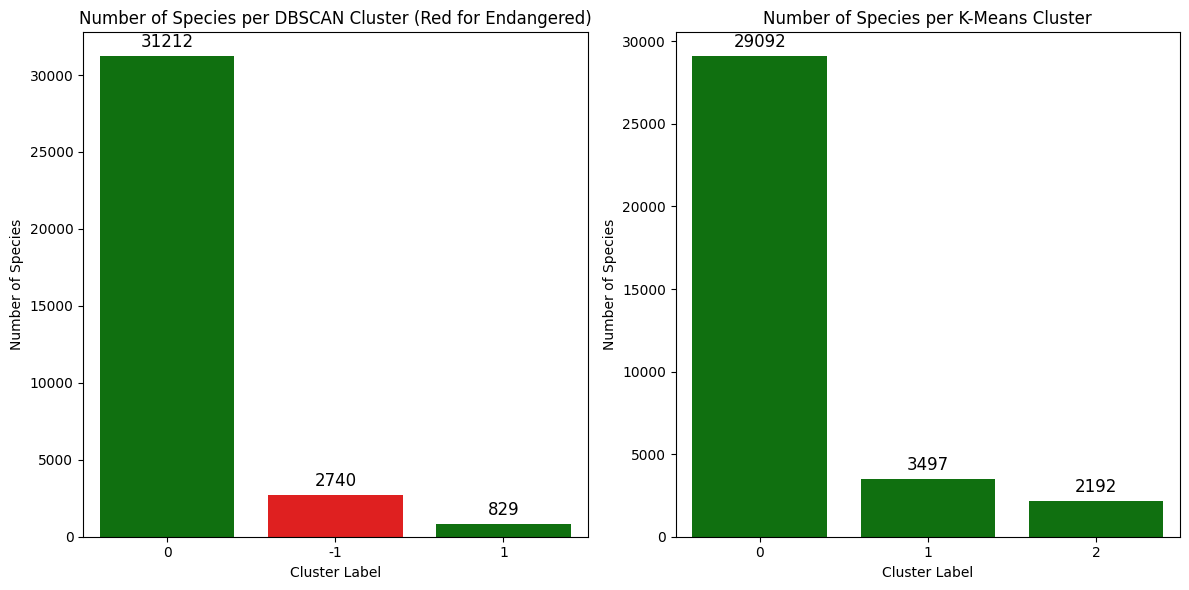

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of species in each DBSCAN cluster (including noise points)
dbscan_cluster_counts = reduced_data_df['DBSCAN_Cluster'].value_counts()

# Create a list of colors based on cluster label for DBSCAN
dbscan_colors = ['red' if cluster == -1 else 'green' for cluster in dbscan_cluster_counts.index]

# Count the number of species in each K-Means cluster
kmeans_cluster_counts = reduced_data_df['KMeans_Cluster'].value_counts()

# Create a list of colors based on cluster label for K-Means
kmeans_colors = ['green' for _ in kmeans_cluster_counts.index]  # All K-Means clusters will be green

# Plotting DBSCAN Bar Graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot for DBSCAN
bar_plot_dbscan = sns.barplot(x=dbscan_cluster_counts.index.astype(str), y=dbscan_cluster_counts.values, palette=dbscan_colors)
plt.title('Number of Species per DBSCAN Cluster (Red for Endangered)')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Species')

# Add exact number labels above each bar for DBSCAN
for p in bar_plot_dbscan.patches:
    bar_plot_dbscan.annotate(f'{int(p.get_height())}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center',
                            fontsize=12, color='black',
                            xytext=(0, 10), textcoords='offset points')

# Plotting K-Means Bar Graph
plt.subplot(1, 2, 2)  # Create a subplot for K-Means
bar_plot_kmeans = sns.barplot(x=kmeans_cluster_counts.index.astype(str), y=kmeans_cluster_counts.values, palette=kmeans_colors)
plt.title('Number of Species per K-Means Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Species')

# Add exact number labels above each bar for K-Means
for p in bar_plot_kmeans.patches:
    bar_plot_kmeans.annotate(f'{int(p.get_height())}',
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             fontsize=12, color='black',
                             xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.tight_layout()  # Adjust the layout to make it more readable
plt.show()


**The below code identifies biodiversity hotspots by analyzing the distribution of unique plant species across different states:**

In [ ]:
# Count the number of unique species in each state
species_per_state = reduced_data_df.groupby('States')['Plant_Species'].nunique()

# Sort states by the number of species to find biodiversity hotspots
biodiversity_hotspots = species_per_state.sort_values(ascending=False)

# Display the top 10 biodiversity hotspots (states with the most species)
print("Top Biodiversity Hotspots (States with most species):")
print(biodiversity_hotspots.head(10))


Top Biodiversity Hotspots (States with most species):
States
ca          3418
hi          1896
pr          1582
tx          1112
pr,vi        670
fl           641
ca,or        641
az           513
az,nm,tx     437
ca,nv        391
Name: Plant_Species, dtype: int64
